# Introdução da referência e controle integral

Há várias formas de introduzir a referência em um sistema de controle de espaço de estados.

Neste curso veremos apenas como fazer com o uso de um integrador.

Sabemos que um integrador em malha aberta zera o erro de regime permanente (para uma entrada degrau pelo menos) e permite ao sistema rejeitar distúrbios (do tipo degrau). Portanto, é uma escolha sensata.

Para introduzir um integrador no espaço de estados, adicionamos uma parcela especial ao sinal de controle  de realimentação de estados (supondo realimentação completa)
$$
\begin{align*}
    u = -\mathbf{Kx} - K_i e
\end{align*}
$$
ou
$$
\begin{align*}
    u = -\left[\begin{array}{cc}\mathbf{K} & K_i\end{array}\right]
    \left[\begin{array}{c}\mathbf{x} \\ e\end{array}\right]
\end{align*}
$$
onde $e$ representa um **novo estado**. Isso aumenta a ordem do nosso sistema em 1. Além disso, o ganho (escalar) $K_i$ representa um novo parâmetro de projeto para o controlador. 

A nova variável de estado $e$ representa a integral do erro, que é um termo que tipicamente utilizamos em controle (PI, por exemplo). Ora, se:

$$
\begin{align*}
    {e} = \int (r-y)dt
\end{align*}
$$

Então:

$$
\begin{align*}
    \dot{e} = r-\mathbf{Hx}
\end{align*}
$$

Onde $\mathbf{H}$ é a matriz de saída do nosso sistema $(\mathbf{F}, \mathbf{G}, \mathbf{H}, J)$.

 Com essa última equação, nosso sistema completo (agora de ordem $n+1$) fica:
 
 $$
\begin{align*}
    \dot{\mathbf{x}} &= \mathbf{Ax}+\mathbf{B}u\\
    \dot{e} &= r-\mathbf{Cx}
\end{align*}
$$

Em notação matricial em blocos temos:
$$
\begin{align*}
    \left[\begin{array}{c}\dot{\mathbf{x}}\\ \dot{e}\end{array}\right]&=
    \left[\begin{array}{cc}\mathbf{A} & \mathbf{0}\\-\mathbf{C} & 0\end{array}\right]\left[\begin{array}{c}{\mathbf{x}}\\ {e}\end{array}\right]+\left[\begin{array}{c}\mathbf{B}\\ 0\end{array}\right]u+\left[\begin{array}{c}\mathbf{0}\\ 1\end{array}\right]r
\end{align*}
$$

Perceba que isso apenas redefiniu o vetor de estados para a junção de $\mathbf{x}$ com $e$, o que aumentou as matrizes de estado e de entrada do sistema. 

Na verdade, neste momento temos duas entradas neste sistema, $u$ e $r$, que atuam de forma independente (cada uma com sua própria matriz). Nossa liberdade de projeto está no sinal $u$, que é responsável por fazer a realimentação de estados. 

Através do sinal $u$ temos exatamente o mesmo problema de realimentação de estados que estávamos trabalhando até aqui. Podemos então achar um regulador normalmente, usando, por exemplo, Ackerman. Apenas devemos atentar para usar as matrizes aumentadas de estado e de entrada:
$$
\begin{align*}
    \mathbf{A_a}&=
    \left[\begin{array}{cc}\mathbf{A} & \mathbf{0}\\-\mathbf{C} & 0\end{array}\right]\\
    \mathbf{B_a}&=\left[\begin{array}{c}\mathbf{B}\\ 0\end{array}\right]
\end{align*}
$$

Desta forma, o último ganho do vetor calculado será o ganho integral.

Para finalizar o compensador, devemos calcular o observador de estados. O projeto é feito normalmente, sem aumentar as matrizes. Isso porque o novo estado é calculado diretamente da saída e não precisa ser estimado.

### Equações de estado do compensador:
$$
\begin{align*}
    \left[\begin{array}{c}\dot{\mathbf{\hat{x}}}\\ \dot{e}\end{array}\right]&=
    \left[\begin{array}{cc}\mathbf{A-BK-LC} & \mathbf{-B}K_i\\ \mathbf{0} & 0\end{array}\right]\left[\begin{array}{c}{\mathbf{\hat{x}}}\\ {e}\end{array}\right]+\left[\begin{array}{c}\mathbf{L}\\ -1\end{array}\right]y+\left[\begin{array}{c}\mathbf{0}\\ 1\end{array}\right]r\\
    u &= \left[\begin{array}{cc}\mathbf{-K} & -K_i\end{array}\right]\left[\begin{array}{c}{\mathbf{\hat{x}}}\\ {e}\end{array}\right]
\end{align*}
$$

É interessante observar que esse compensador requer duas entradas distintas para ser realizado: a referência e a saída da planta.

Lembre-se que do ponto de vista do controlador, a saída é o sinal de controle $u$. Portanto, a saída da planta $y$ é vista por ele como uma entrada, assim como a referência $r$.

Podemos enxergá-lo através de duas funções de transferência: uma de $Y$ para $U$ e outra de $R$ para $U$. Assim, a saída do controlador poderia ser descrita como:
$$
\begin{align}
    U(s) = C_1(s)Y(s)+C_2(s)R(s)
\end{align}
$$

As funções de transferência $C_1(s)$ e $C_2(s)$ podem ser calculadas pelas matrizes usando a expressão que já estudamos. 

Do ponto de vista de fluxo de sinal, o sistema controlador funciona conforme o diagrama de blocos a seguir

<p align="center">
<img src="controleIntegral.svg" width="60%">
</p>

Esse diagrama pode ser modificado para utilizar a estrutura convencional de controle com realimentação unitária, mas nesse caso, o bloco que alimenta a referência sofre modificação (*desafio: verifique que diagrama é esse*)

### Equações de estado do sistema em malha fechada (supondo $J=0$):

Lembre-se que em malha fechada, a entrada do sistema passa a ser apenas a referência:

$$
\begin{align*}
    \dot{\mathbf{x}} &= \mathbf{Ax}-\mathbf{BK}\hat{\mathbf{x}}-\mathbf{B}K_ie\\
    \dot{\hat{\mathbf{x}}} &= \mathbf{LCx}+(\mathbf{A}-\mathbf{BK}-\mathbf{LC})\hat{\mathbf{x}}-\mathbf{B}K_ie\\
    \dot{e} &= r-\mathbf{Cx}\\
    y &= \mathbf{Cx}
\end{align*}
$$

Em termos de matrizes fica:
$$
\begin{align*}
    \mathbf{F}_{\text{mf}} &= \left[\begin{array}{ccc}
    \mathbf{F} & -\mathbf{GK} & -\mathbf{G}K_i\\
    \mathbf{LH} & \mathbf{F-GK-LH} & -\mathbf{G}K_i\\
    -\mathbf{H} & \mathbf{0} & 0
    \end{array}\right]\\
    \mathbf{G}_{\text{mf}} &= \left[\begin{array}{ccc}
    \mathbf{0}\\ \mathbf{0}\\ 1
    \end{array}\right]\\
    \mathbf{H}_{\text{mf}} &= \left[\begin{array}{ccc}
    \mathbf{H} & \mathbf{0} & 0
    \end{array}\right]
\end{align*}
$$

## Exemplo:

Construa um compensador com controle integral para o sistema
$$
\begin{align}
    G(s) = \frac{10}{(s+1)(s+2)}
\end{align}
$$
para que $\xi = 0.7$ e $\omega_n=2$.


In [3]:
# Imports
import numpy as np
import control as ct
from IPython.display import display, Math
from escrever import *
esc = escrever()

In [6]:
# Polos desejados
xi = 0.7
wn = 2
sigma = xi*wn
p = -sigma + 1j*wn*np.sqrt(1-xi**2)
p_reg = np.array([p,np.conj(p),-4*sigma])
print('Pólos do regulador: ', p_reg.round(4))

Pólos do regulador:  [-1.4+1.4283j -1.4-1.4283j -5.6+0.j    ]


In [13]:
# Matrizes do sistema em FCC
A = np.array([[-3,-2],[1,0]])
B = np.array([[1],[0]])
C = np.array([[0,10]])
D = np.zeros((1,1))

sys = ct.ss(A,B,C,D)
esc.sist(A,B,C,D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Função de transf. de malha aberta
ct.tf(sys)

TransferFunction(array([10.]), array([1., 3., 2.]))

In [14]:
# Matrizes do sistema aumentado
Aa = np.block([[F,np.zeros((2,1))],[-H,0]])           # [F  | 0]
Ba = np.concatenate((G,[[0]]),axis=0)
display(Math(r'\mathbf{A}_a = ' + esc.mat(Aa)))
display(Math(r'\mathbf{B}_a = ' + esc.mat(Ba)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
# Regulador com integrador
Ka = ct.acker(Aa,Ba,p_reg)
Ki = np.array([Ka[:,2]])
K = Ka[:,0:2]
display(Math(r'\mathbf{K}_a = ' + esc.mat(Ka.round(4))))
display(Math(r'\mathbf{K} = ' + esc.mat(K.round(4))))
display(Math(r'{K}_i = ' + esc.mat(Ki.round(4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
# Observador
p_obs = [-8*sigma]*2                    # [-8*sigma]*2 => [-8*sigma, -8*sigma]
L = ct.acker(F.T,H.T, p_obs).T        
display(Math(r'\mathbf{L} = ' + esc.mat(L)))

<IPython.core.display.Math object>

In [25]:
# Sistema em malha fechada

# Primeito a matriz F
Amf = np.block([[A, -B@K, -B@Ki],
                [L@C, A-B@K-L@C, -B@Ki],
                [-C, np.zeros((1,3))]])

# Agora a matriz G
Bmf = np.block([[np.zeros((4,1))],[1]])

# Por fim, matriz H, saída da planta
Cmf = np.block([[C,np.zeros((1,3))]])

Dmf = np.zeros((Cmf.shape[0],Bmf.shape[1]))
                
# Espaço de estados para o sistema em MF, saída y, entrada r
MF = ct.ss(Amf,Bmf,Cmf,Dmf)
esc.sist(Amf.round(4),Bmf.round(4),Cmf.round(4),Dmf)
                


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
# Função de transf. em malha fechada
ct.tf(MF)

TransferFunction(array([-2.84217094e-14, -7.38964445e-13,  2.24000000e+01,  5.01760000e+02,
        2.80985600e+03]), array([1.0000000e+00, 3.0800000e+01, 3.3328000e+02, 1.5169280e+03,
       2.9704192e+03, 2.8098560e+03]))

In [33]:
# Vamos analisar polos e zeros de malha fechada
tabela=ct.damp(MF)

print('Zeros: ')
print(round(ct.zeros(MF),4))
print('')
# Vale a pena comparar com os zeros do sistema e polos desejados originais, regulador e observador
print('Pólos desejados (regulador): ')
print(p_reg.round(4))
print('')
print('Pólos desejados (observador): ')
print(round(p_obs,4))


_____Eigenvalue______ Damping___ Frequency_
     -11.2                     1       11.2
     -11.2                     1       11.2
      -1.4    +1.428j        0.7          2
      -1.4    -1.428j        0.7          2
      -5.6                     1        5.6
Zeros: 
[-11.2+0.j -11.2+0.j]

Pólos desejados (regulador): 
[-1.4+1.4283j -1.4-1.4283j -5.6+0.j    ]

Pólos desejados (observador): 
[-11.2 -11.2]


In [35]:
# Simulação em malha fechada (y)
resp = ct.step_response(MF,6)

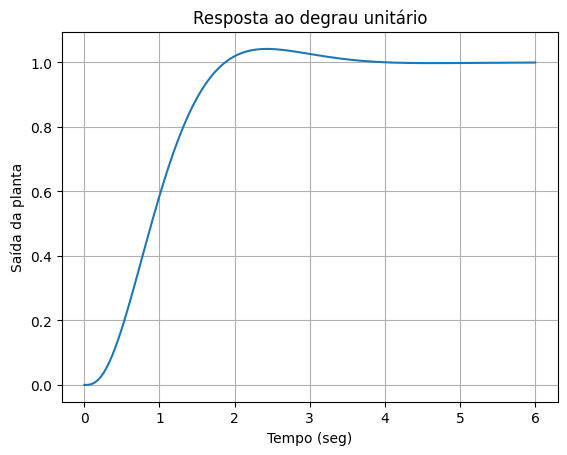

In [56]:
# Plotagem da saída
plt.plot(resp.t,resp.outputs)
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída da planta')
plt.title('Resposta ao degrau unitário')
plt.grid()

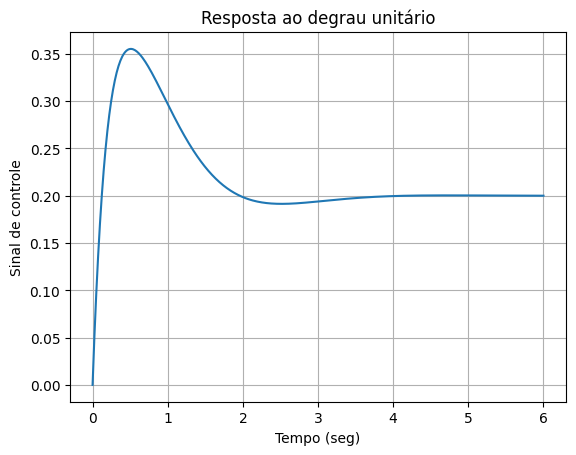

In [55]:
# Calcula o sinal de controle utilizado
u = -Ka@resp.states[2:,:]
u = u.reshape((u.shape[1],))
plt.plot(resp.t,u)
plt.xlabel('Tempo (seg)')
plt.ylabel('Sinal de controle')
plt.title('Resposta ao degrau unitário')
plt.grid()

